# 🧪 Laboratorio 8
Integrantes
- Diego Alexander Hernández Silvestre - 21270
- Linda Inés Jiménez Vides - 21169
- Mario Antonio Guerra Morales - 21008
- Kristopher Javier Alvarado López - 21188

## 💻 Task 1

In [316]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers, models

In [317]:
dataTrain = pd.read_csv('data/train.csv')
dataTrain

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [318]:
dataTrain.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [319]:
dataTrain['date'] = pd.to_datetime(dataTrain['date'])

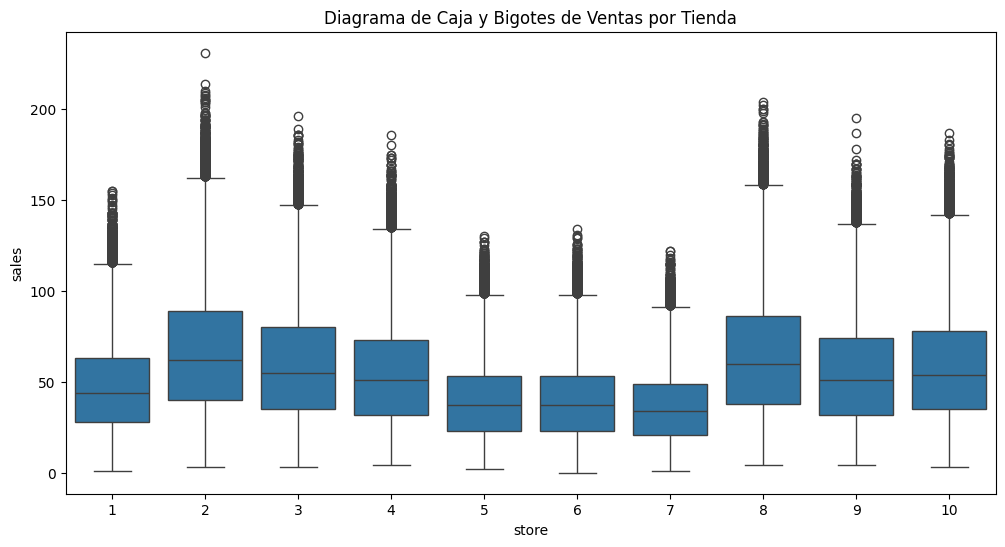

In [320]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='store', y='sales', data=dataTrain)
plt.title('Diagrama de Caja y Bigotes de Ventas por Tienda')
plt.show()

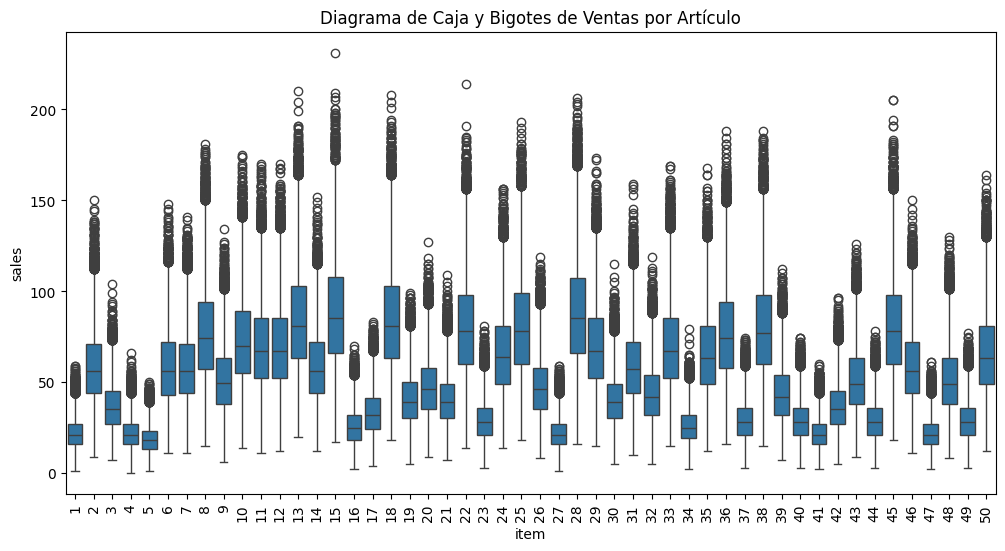

In [321]:
# Boxplot de las ventas ('sales') por artículo ('item')
plt.figure(figsize=(12, 6))
sns.boxplot(x='item', y='sales', data=dataTrain)
plt.title('Diagrama de Caja y Bigotes de Ventas por Artículo')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si hay muchos artículos
plt.show()

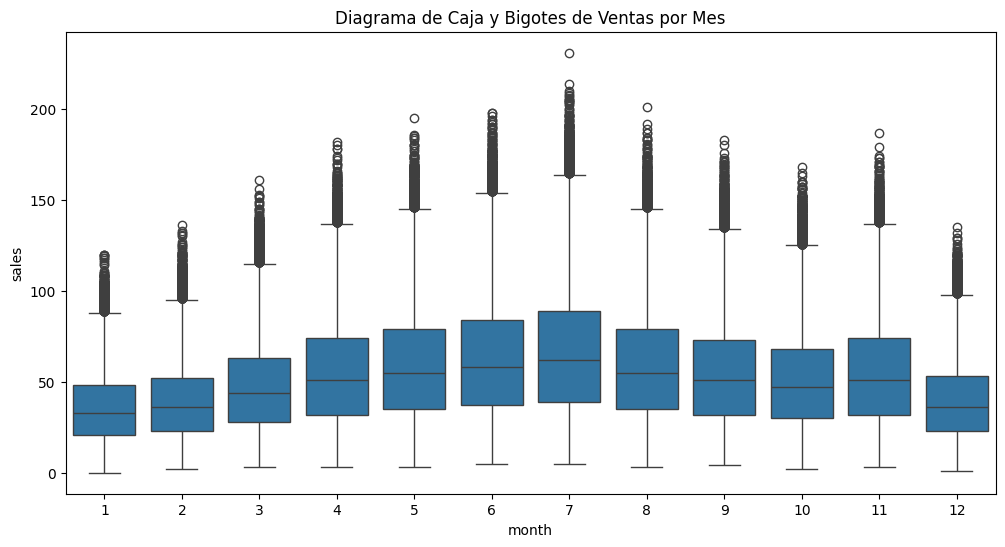

In [322]:
dataTrain['month'] = dataTrain['date'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='sales', data=dataTrain)
plt.title('Diagrama de Caja y Bigotes de Ventas por Mes')
plt.show()

In [323]:
dataTrain.describe()

,date,store,item,sales,month
count,913000,913000.000000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287,6.523549
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000,1.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000,4.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000,7.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000,10.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000,12.000000
std,NaN,2.872283,14.430878,28.801144,3.448535


In [324]:
# Calcular el rango intercuartílico (IQR)
Q1 = dataTrain['sales'].quantile(0.25)
Q3 = dataTrain['sales'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

print(f"Límite superior: {upper_bound}")


Límite superior: 130.0


In [325]:
# Filtrar los datos eliminando solo los valores superiores al límite
dataTrain_filtered = dataTrain[dataTrain['sales'] <= upper_bound]

print(f"Filas originales: {len(dataTrain)}, Filas después de eliminar outliers superiores: {len(dataTrain_filtered)}")


Filas originales: 913000, Filas después de eliminar outliers superiores: 901033


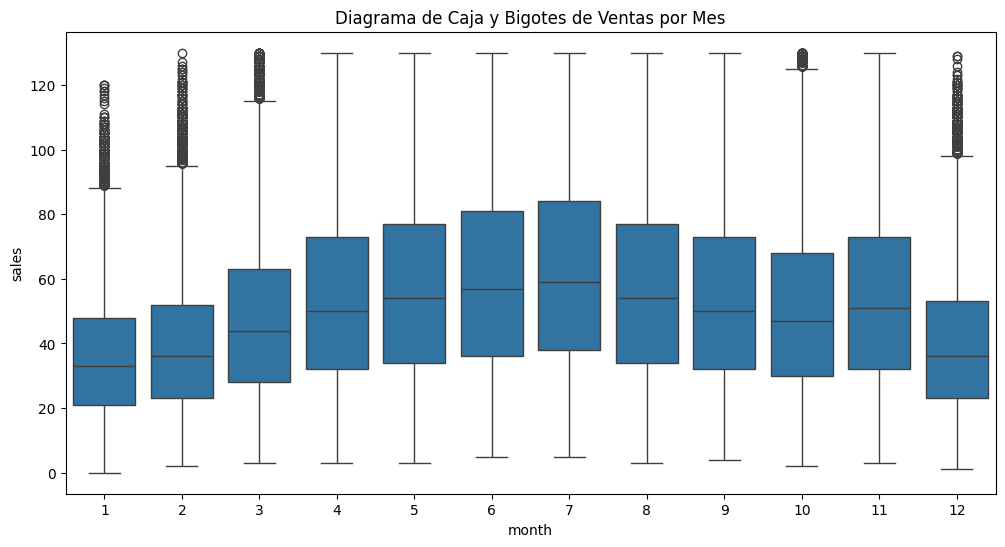

In [326]:
dataTrain['month'] = dataTrain['date'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='sales', data=dataTrain_filtered)
plt.title('Diagrama de Caja y Bigotes de Ventas por Mes')
plt.show()

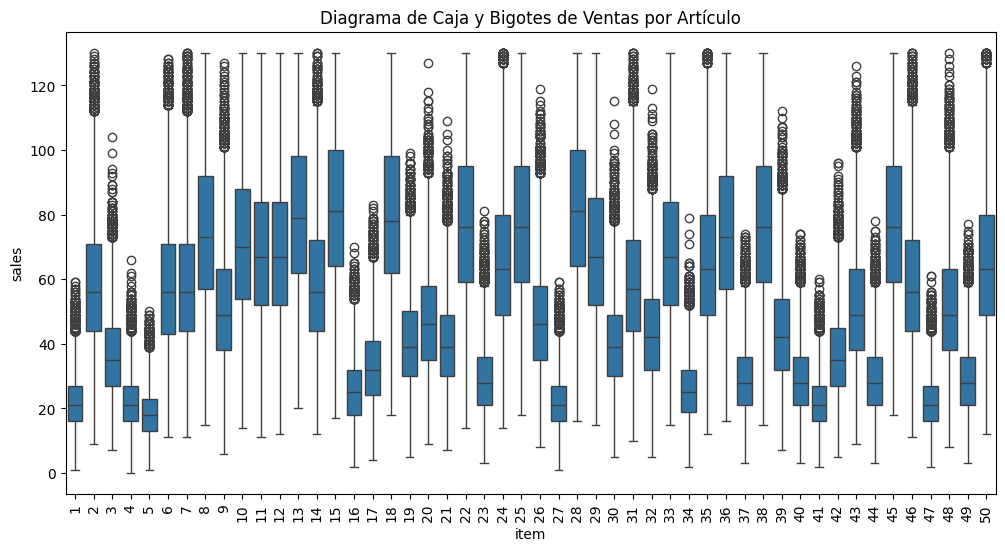

In [327]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='item', y='sales', data=dataTrain_filtered)
plt.title('Diagrama de Caja y Bigotes de Ventas por Artículo')
plt.xticks(rotation=90) 
plt.show()

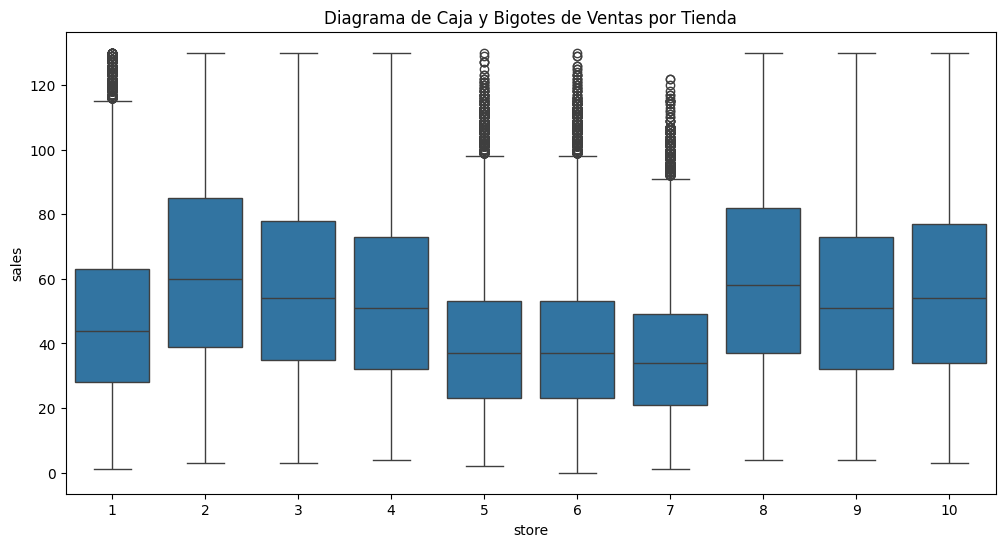

In [328]:
dataTrain['date'] = pd.to_datetime(dataTrain['date'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='store', y='sales', data=dataTrain_filtered)
plt.title('Diagrama de Caja y Bigotes de Ventas por Tienda')
plt.show()

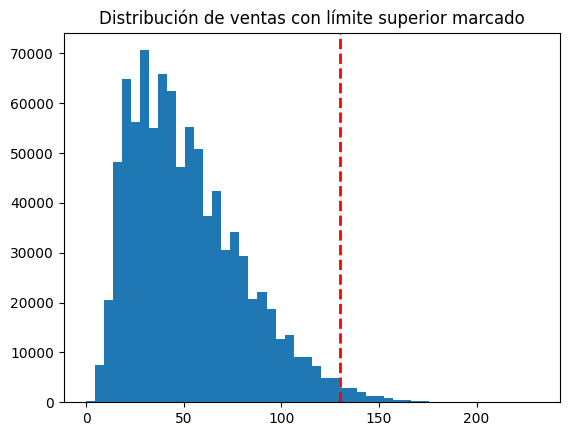

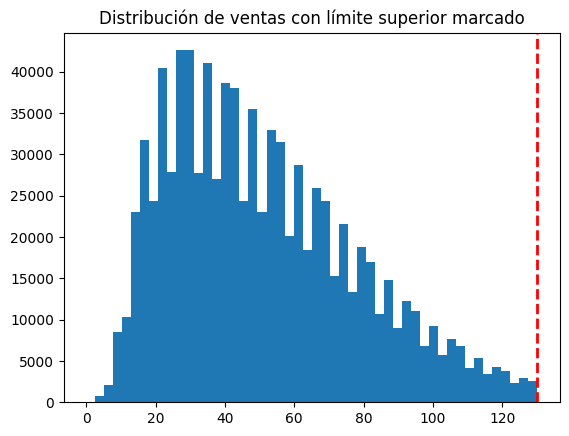

In [329]:
plt.hist(dataTrain['sales'], bins=50)
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución de ventas con límite superior marcado')
plt.show()

plt.hist(dataTrain_filtered['sales'], bins=50)
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribución de ventas con límite superior marcado')
plt.show()


In [330]:
dataTrain_filtered.describe()

,date,store,item,sales,month
count,901033,901033.000000,901033.000000,901033.000000,901033.000000
mean,2015-06-27 11:01:56.558217216,5.503666,25.526636,51.032028,6.518636
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000,1.000000
25%,2014-03-27 00:00:00,3.000000,13.000000,29.000000,3.000000
50%,2015-06-25 00:00:00,6.000000,26.000000,46.000000,7.000000
75%,2016-09-26 00:00:00,8.000000,38.000000,68.000000,10.000000
max,2017-12-31 00:00:00,10.000000,50.000000,130.000000,12.000000
std,NaN,2.867474,14.470524,26.932926,3.465358


In [331]:
# Ordenar los datos por store, item y fecha
df = dataTrain_filtered.sort_values(['store', 'item', 'date'])

# Verificar los primeros registros
print(df.head())


        date  store  item  sales  month
0 2013-01-01      1     1     13      1
1 2013-01-02      1     1     11      1
2 2013-01-03      1     1     14      1
3 2013-01-04      1     1     13      1
4 2013-01-05      1     1     10      1


In [332]:
# Verificar valores faltantes
print(df.isnull().sum())

# Si hay valores faltantes en 'sales', puedes rellenarlos con 0 o con la media
df['sales'].fillna(0, inplace=True)


date     0
store    0
item     0
sales    0
month    0
dtype: int64


C:\Users\lijv1.LINDA_HP\AppData\Local\Temp\ipykernel_18976\1358137292.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sales'].fillna(0, inplace=True)


In [333]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el scaler
scaler = MinMaxScaler()

# Escalar la columna 'sales'
df['sales_scaled'] = scaler.fit_transform(df[['sales']])

# Verificar los cambios
print(df[['sales', 'sales_scaled']].head())


   sales  sales_scaled
0     13      0.100000
1     11      0.084615
2     14      0.107692
3     13      0.100000
4     10      0.076923


In [334]:
# Definir la fecha de corte para el conjunto de prueba (últimos 3 meses)
test_start_date = df['date'].max() - pd.DateOffset(months=3)

# Dividir los datos
train_val = df[df['date'] < test_start_date]
test = df[df['date'] >= test_start_date]

# Ahora, dividir train_val en entrenamiento y validación (por ejemplo, 80-20)
train_size = int(len(train_val) * 0.8)
train = train_val.iloc[:train_size]
val = train_val.iloc[train_size:]

print(f'Tamaño de entrenamiento: {len(train)}')
print(f'Tamaño de validación: {len(val)}')
print(f'Tamaño de prueba: {len(test)}')


Tamaño de entrenamiento: 684050
Tamaño de validación: 171013
Tamaño de prueba: 45970


In [335]:
def create_sequences(data, seq_length, forecast_horizon):
    """
    Crea secuencias de datos para entrenamiento.
    
    :param data: Array de datos escalados.
    :param seq_length: Número de pasos de tiempo en la secuencia de entrada.
    :param forecast_horizon: Número de pasos de tiempo a predecir.
    :return: Tuplas de (secuencia de entrada, secuencia de salida).
    """
    X = []
    y = []
    for i in range(len(data) - seq_length - forecast_horizon + 1):
        X.append(data[i:(i + seq_length)])
        y.append(data[(i + seq_length):(i + seq_length + forecast_horizon)])
    return np.array(X), np.array(y)

# Parámetros
SEQ_LENGTH = 30  # Por ejemplo, usar 30 días anteriores
FORECAST_HORIZON = 90  # Predecir los próximos 3 meses (asumiendo 30 días por mes)

# Aplicar a los conjuntos de entrenamiento, validación y prueba
X_train, y_train = create_sequences(train['sales_scaled'].values, SEQ_LENGTH, FORECAST_HORIZON)
X_val, y_val = create_sequences(val['sales_scaled'].values, SEQ_LENGTH, FORECAST_HORIZON)
X_test, y_test = create_sequences(test['sales_scaled'].values, SEQ_LENGTH, FORECAST_HORIZON)

print(f'Entrenamiento: {X_train.shape}, {y_train.shape}')
print(f'Validación: {X_val.shape}, {y_val.shape}')
print(f'Prueba: {X_test.shape}, {y_test.shape}')


Entrenamiento: (683931, 30), (683931, 90)
Validación: (170894, 30), (170894, 90)
Prueba: (45851, 30), (45851, 90)


In [355]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Funciones de transformación y preparación de datos (modificadas)
def transformar_datos(df):
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(['date', 'store', 'item'])
    df['year'] = df['date'].dt.year
    df['day_of_week'] = df['date'].dt.dayofweek
    df['day_of_month'] = df['date'].dt.day
    
    scaler = MinMaxScaler()
    df['sales_normalized'] = scaler.fit_transform(df[['sales']])
    
    return df, scaler

def preparar_secuencias(df, ventana_pasado=30, ventana_futuro=90):
    secuencias = []
    objetivos = []
    
    for (store, item), group in df.groupby(['store', 'item']):
        datos = group['sales_normalized'].values
        for i in range(len(datos) - ventana_pasado - ventana_futuro + 1):
            secuencias.append(datos[i:i+ventana_pasado])
            objetivos.append(datos[i+ventana_pasado:i+ventana_pasado+ventana_futuro])
    
    return np.array(secuencias), np.array(objetivos)

# Modelo LSTM (sin cambios)
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Función de entrenamiento (modificada)
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}')

# Aplicar las funciones y preparar los datos
df_transformado, scaler = transformar_datos(dataTrain_filtered)

X, y = preparar_secuencias(df_transformado)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Convertir a tensores de PyTorch (modificado)
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

# Crear DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Inicializar el modelo
input_size = 1  # Número de características (solo ventas en este caso)
hidden_size = 64
output_size = y_train.shape[1]  # Número de días a pronosticar
model = LSTMModel(input_size, hidden_size, output_size)

# Definir criterio y optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50)

# Realizar predicciones
model.eval()
with torch.no_grad():
    predicciones = model(X_test).cpu().numpy()

# Desnormalizar las predicciones
predicciones_desnormalizadas = scaler.inverse_transform(predicciones)
y_test_desnormalizada = scaler.inverse_transform(y_test.numpy())

# Evaluar el modelo
mse = np.mean((predicciones_desnormalizadas - y_test_desnormalizada)**2)
print(f"Error cuadrático medio en el conjunto de prueba: {mse}")

# Imprimir formas de los datos para diagnóstico
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de un batch de X: {next(iter(train_loader))[0].shape}")

C:\Users\lijv1.LINDA_HP\AppData\Local\Temp\ipykernel_18976\3182341559.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [351]:
# Entrenar el modelo
# Ensure input is 3-dimensional
if X_train.dim() == 2:
    X_train = X_train.unsqueeze(-1)
if X_val.dim() == 2:
    X_val = X_val.unsqueeze(-1)

train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50)

# Realizar predicciones
model.eval()
with torch.no_grad():
    # Ensure input is 3-dimensional
    if X_test.dim() == 2:
        X_test = X_test.unsqueeze(-1)
    predicciones = model(X_test).numpy()

# Desnormalizar las predicciones
predicciones_desnormalizadas = scaler.inverse_transform(predicciones)
y_test_desnormalizada = scaler.inverse_transform(y_test.numpy())

# Evaluar el modelo
mse = np.mean((predicciones_desnormalizadas - y_test_desnormalizada)**2)
print(f"Error cuadrático medio en el conjunto de prueba: {mse}")

RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

## 💻 Task 2

**1. ¿Cuál es el problema del gradiente de fuga en las redes LSTM y cómo afecta la efectividad de LSTM para el pronóstico de series temporales**

El problema del gradiente de fuga en las redes LSTM ocurre cuando los gradientes se vuelven muy pequeños durante el backpropagation, lo que limita la capacidad de la red para aprender patrones a largo plazo en series temporales. Aunque las LSTM esten diseñadas para mitigar este problema con sus celdas de memoria aún puede afectar la efectividad del modelo en pronóstico de secuencias largar, reduciendo su capacidad de capturar dependencias temporales profundas.

**2. ¿Cómo se aborda la estacionalidad en los datos de series temporales cuando se utilizan LSTM para realizar pronósticos y qué papel juega la diferenciación en el proceso?**

Se aborda incorporando características que capturen patrones repetitivos, como incluir datos adicionales que reflejen la preiodicidad (mes o día de la semana) o aplicando transformaciones a los datos. La diferenciación juega un papel clave al eliminar la tendencia y estacionalidad de los datos estabilizando la serie temporal y facilitando que la LSTM enfoque su capacidad de aprendizaje en las fluctuaciones residuales, mejorando la presición del pronóstico. 

**3. ¿Cuál es el concepto de "tamaño de ventana" en el pronóstico de series temporales con LSTM y cómo afecta la elección del tamaño de ventana a la capacidad del modelo para capturar patrones a corto y largo plazo?**

El concepto de "tamaño de ventana" se refiere a la cantidad de pasos temporales pasados que se utilizan como entrada para predecir los valores futuros. Elegir un tamaño de ventana adecuado es importante, ya que un tamaño pequeño permite capturar patrones a corto plazo, pero puede perder dependencias a largo plazo, mientras que una ventana grande permite al modelo aprender relaciones a largo alcance, pero puede introducir ruido o redundancia y aumentar la complejidad del entrenamiento. 